# 02. 상관관계 분석

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = pymysql.connect(host='localhost', user='ssafy', password='ssafy',
                       db='docong_test_v1', charset='utf8')
cursor = conn.cursor()

# 데이터

def get_data(table):
    cursor.execute(f'SELECT * FROM {table}')
    return cursor.fetchall()

# 컬럼

def get_columns(table):
    cursor.execute(f'SHOW columns FROM {table}')
    columns = cursor.fetchall()
    
    table_columns = []
    for column in columns:
        table_columns.append(column[0])
    
    table_columns[0] = f'{table}_seq'
    return table_columns

In [8]:
# todo

todo_data = get_data('todo')
todo_columns = get_columns('todo')
todo_df = pd.DataFrame(todo_data, columns = todo_columns)

todo_df.drop(['content', 'title'], axis=1, inplace=True)
todo_df.head()

,todo_seq,created_date,modified_date,predicted_pomo,real_pomo,status,work_importance,work_proficiency,work_type,team_seq
0,17,2022-03-23 05:21:01,2022-03-24 15:21:18,8,8,2,3,1,2,None
1,19,2022-03-23 05:21:55,2022-03-24 05:01:30,4,1,2,3,2,13,None
2,23,2022-03-23 05:29:18,2022-03-24 00:32:12,2,2,2,3,0,4,None
3,25,2022-03-23 05:29:48,2022-03-25 02:05:03,4,5,1,3,0,6,None
4,27,2022-03-23 05:31:51,2022-03-24 00:59:39,3,4,2,3,1,2,None


In [9]:
todo_df = todo_df.drop(['todo_seq', 'created_date', 'modified_date', 'team_seq'], axis=1)

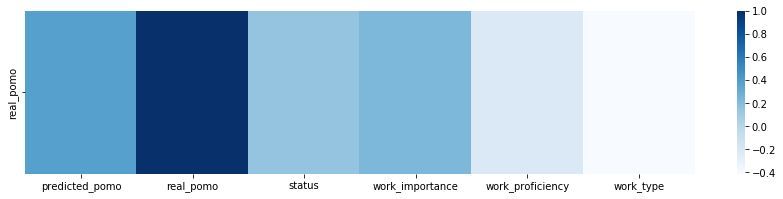

In [18]:
todo_corr = todo_df.corr()

plt.figure(figsize=(15, 3))
sns.heatmap(todo_corr.sort_values(by=['real_pomo'], ascending=False).head(1), cmap='Blues')
plt.show()

In [13]:
todo_corr['real_pomo'].sort_values(ascending=False).to_frame()

,real_pomo
real_pomo,1.000000
predicted_pomo,0.384150
work_importance,0.231069
status,0.150989
work_proficiency,-0.209660
work_type,-0.412829
